# Linear Regression

## data

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as opt

In [6]:
path =  '../data/Linearity/house_price.csv'

data = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])  
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


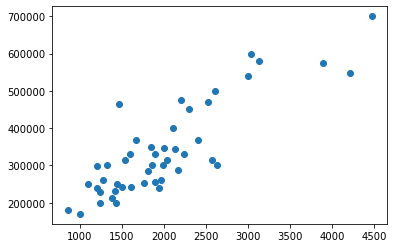

In [8]:
plt.scatter(data['Size'], data['Price'])
plt.show()

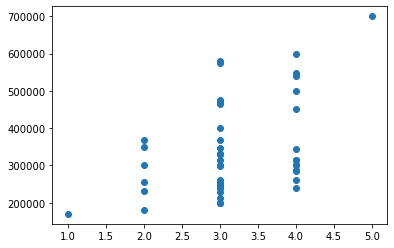

In [9]:
plt.scatter(data['Bedrooms'], data['Price'])

## data proccess

In [10]:
data = (data - data.mean()) / data.std()
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [11]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
X = np.array(X)
y = np.array(y)
theta = np.matrix([0, 0, 0])

X.shape, theta.shape, y.shape

((47, 3), (1, 3), (47, 1))

## gradient descent

In [13]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) -  y), 2)
    return np.sum(inner) / (2 * len(X))

In [14]:
computeCost(X, y, theta)

0.48936170212765967

In [15]:
def gradientDescent(X, y, theta, alpha, batch):

    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(batch)
    m = X.shape[0]
    
    for i in range(batch):
        temp = theta - (alpha / m) * (X * theta.T - y).T * X
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
alpha = 0.01
epoch = 1000
res, cost = gradientDescent(X, y, theta, alpha, epoch)

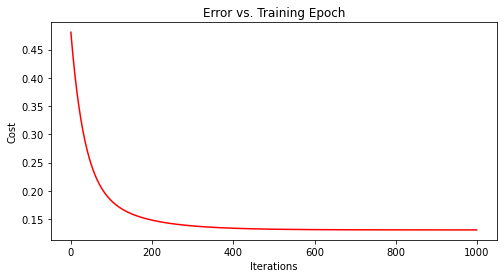

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## normal equation

In [18]:
def normalEquation(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

theta0 = normalEquation(X,y)

In [19]:
res.T - theta0 # 两种方法求得的参数相差不大

matrix([[-1.72183369e-17],
        [-6.26233563e-03],
        [ 6.26216263e-03]])